In [ ]:
import cv2
cv2.__version__

'4.1.2'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
options = {"model": "/content/drive/My Drive/weights/yolov2-voc-c1.cfg", 
           "load": "/content/drive/My Drive/weights/yolov2-voc.weights",
           "batch":8,
           "epoch": 100,
           "gpu": 2.0,
           "train": True,
           "annotation": "/content/TIGER DATA/annotations",
           "dataset": "/content/TIGER DATA/images"}

In [ ]:
tfnet = TFNet(options)

Parsing ./cfg/yolov2-voc.cfg
Parsing /content/drive/My Drive/weights/yolov2-voc-c1.cfg
Loading /content/drive/My Drive/weights/yolov2-voc.weights ...
Successfully identified 202704264 bytes
Finished in 0.0734102725982666s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 5

In [ ]:
tfnet.train()

Streaming output truncated to the last 5000 lines.
step 10055 - loss 1.5986828804016113 - moving ave loss 1.2554583145040001
step 10056 - loss 1.0715298652648926 - moving ave loss 1.2370654695800896
step 10057 - loss 0.9959582090377808 - moving ave loss 1.2129547435258587
step 10058 - loss 1.1173884868621826 - moving ave loss 1.2033981178594912
step 10059 - loss 0.7152339816093445 - moving ave loss 1.1545817042344766
step 10060 - loss 1.4578821659088135 - moving ave loss 1.1849117504019102
step 10061 - loss 0.7691201567649841 - moving ave loss 1.1433325910382177
step 10062 - loss 0.942068874835968 - moving ave loss 1.1232062194179928
step 10063 - loss 1.7513885498046875 - moving ave loss 1.1860244524566625
step 10064 - loss 0.7492698431015015 - moving ave loss 1.1423489915211464
step 10065 - loss 0.8195807337760925 - moving ave loss 1.110072165746641
step 10066 - loss 0.8072646856307983 - moving ave loss 1.0797914177350567
step 10067 - loss 1.9061460494995117 - moving ave loss 1.162426

In [ ]:
# this line of code lets you save the built graph to a protobuf file (.pb)
# this step is unnecessary for this notebook
tfnet.savepb()

In [ ]:
options = {"model": "/content/drive/My Drive/weights/yolov2-voc-c1.cfg",
           "load": -1,
           "gpu": 2.0}

In [ ]:
tfnet2 = TFNet(options)

Parsing /content/drive/My Drive/weights/yolov2-voc-c1.cfg
Loading None ...
Finished in 0.00025010108947753906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_

In [ ]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolov2-voc-c1-15000
INFO:tensorflow:Restoring parameters from ./ckpt/yolov2-voc-c1-15000


In [ ]:
import pprint as pp

original_img = cv2.imread("/content/drive/My Drive/tiger/images/t19.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[]


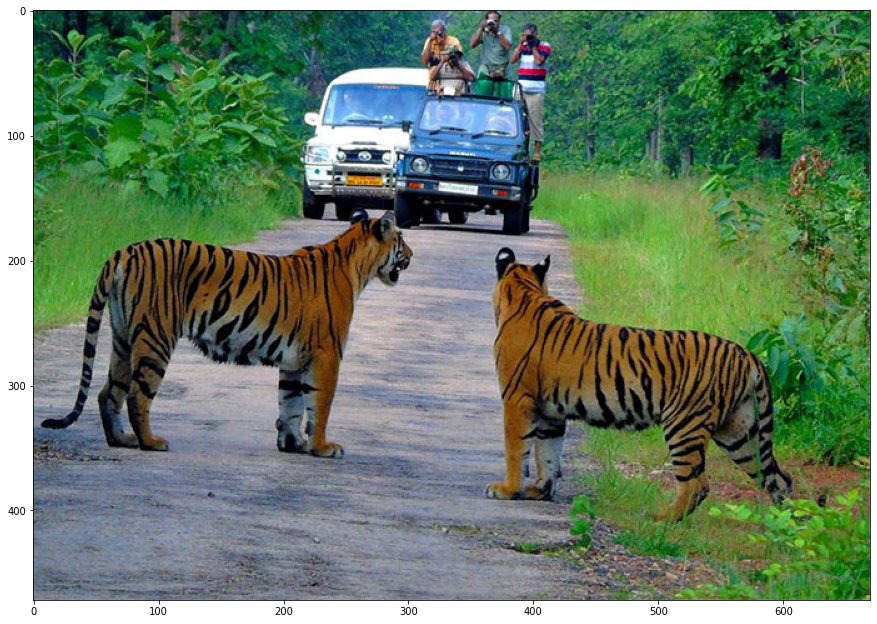

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [ ]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

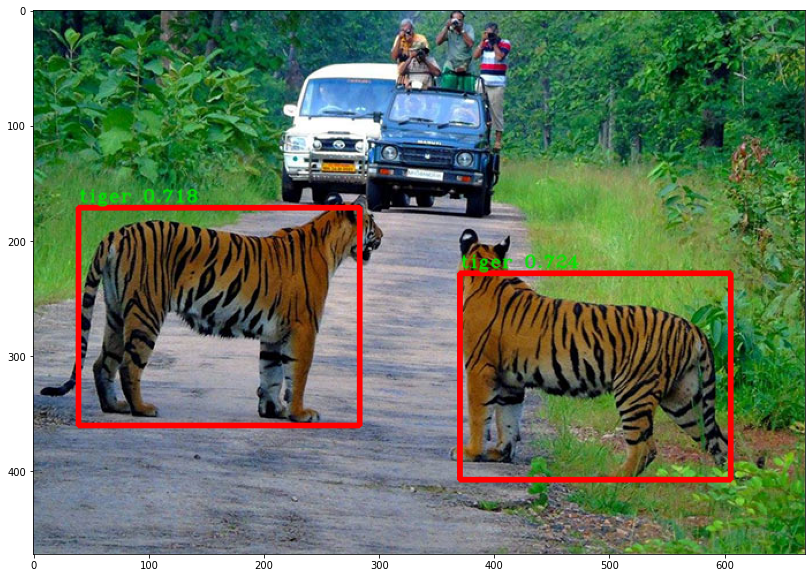

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [ ]:
#Running tiger detection for Videos.
cap = cv2.VideoCapture('/content/drive/My Drive/1videoplayback_1.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('/content/drive/My Drive/tiger/sample_video/output.avi',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        
        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
        #cv2.imshow('frame', new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()   

KeyboardInterrupt: ignored

In [ ]:
#Identifying Unique Tiger
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('Query_image_path',0)          # queryImage
img2 = cv2.imread('Training_image_path',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()